In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu, ttest_ind, t
import seaborn as sns
import math


In [2]:
dados = pd.read_csv('2023_nba_player_stats.csv')

In [ ]:
dados

,Player,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25.0,74.0,52.0,22.0,2732.2,2225.0,727.0,...,649.0,342.0,213.0,78.0,51.0,160.0,3691.0,31.0,1.0,470.0
1,Joel Embiid,C,PHI,29.0,66.0,43.0,23.0,2284.1,2183.0,728.0,...,670.0,274.0,226.0,66.0,112.0,205.0,3706.0,39.0,1.0,424.0
2,Luka Doncic,PG,DAL,24.0,66.0,33.0,33.0,2390.5,2138.0,719.0,...,569.0,529.0,236.0,90.0,33.0,166.0,3747.0,36.0,10.0,128.0
3,Shai Gilgeous-Alexander,PG,OKC,24.0,68.0,33.0,35.0,2416.0,2135.0,704.0,...,329.0,371.0,192.0,112.0,65.0,192.0,3425.0,3.0,0.0,149.0
4,Giannis Antetokounmpo,PF,MIL,28.0,63.0,47.0,16.0,2023.6,1959.0,707.0,...,742.0,359.0,246.0,52.0,51.0,197.0,3451.0,46.0,6.0,341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Alondes Williams,NaN,BKN,23.0,1.0,1.0,0.0,5.3,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,1.0,-1.0,0.0,0.0,-5.0
535,Deonte Burton,NaN,SAC,29.0,2.0,1.0,1.0,6.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
536,Frank Jackson,NaN,UTA,24.0,1.0,0.0,1.0,5.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,-2.0
537,Michael Foster Jr.,NaN,PHI,20.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0


In [3]:
dados.describe() .T

,count,mean,std,min,25%,50%,75%,max
Age,539.0,25.970315,4.315513,19.0,23.00,25.0,29.0,42.0
GP,539.0,48.040816,24.650686,1.0,30.50,54.0,68.0,83.0
W,539.0,24.018553,14.496366,0.0,12.00,25.0,36.0,57.0
L,539.0,24.022263,13.445866,0.0,14.00,25.0,34.0,60.0
Min,539.0,1103.617625,827.765114,1.0,329.00,970.2,1845.9,2963.2
PTS,539.0,523.426716,498.084360,0.0,120.50,374.0,769.5,2225.0
FGM,539.0,191.576994,178.351286,0.0,45.50,138.0,283.5,728.0
FGA,539.0,403.005566,369.595909,0.0,93.50,300.0,598.5,1559.0
FG%,539.0,46.325232,10.967271,0.0,41.65,45.5,50.6,100.0
3PM,539.0,56.324675,60.916821,0.0,5.00,36.0,92.0,301.0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    float64
 4   GP      539 non-null    float64
 5   W       539 non-null    float64
 6   L       539 non-null    float64
 7   Min     539 non-null    float64
 8   PTS     539 non-null    float64
 9   FGM     539 non-null    float64
 10  FGA     539 non-null    float64
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    float64
 13  3PA     539 non-null    float64
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    float64
 16  FTA     539 non-null    float64
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    float64
 19  DREB    539 non-null    float64
 20  REB     539 non-null    float64
 21  AST     539 non-null    float64
 22  TO

In [5]:
dados.shape

(539, 30)

In [88]:
x = dados.isnull() .sum()
print(x)

Player    0
POS       5
Team      0
Age       0
GP        0
W         0
L         0
Min       0
PTS       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
OREB      0
DREB      0
REB       0
AST       0
TOV       0
STL       0
BLK       0
PF        0
FP        0
DD2       0
TD3       0
+/-       0
dtype: int64


In [114]:
cem_melhores = dados.head(101)
display(cem_melhores)

,Player,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25.0,74.0,52.0,22.0,2732.2,2225.0,727.0,...,649.0,342.0,213.0,78.0,51.0,160.0,3691.0,31.0,1.0,470.0
1,Joel Embiid,C,PHI,29.0,66.0,43.0,23.0,2284.1,2183.0,728.0,...,670.0,274.0,226.0,66.0,112.0,205.0,3706.0,39.0,1.0,424.0
2,Luka Doncic,PG,DAL,24.0,66.0,33.0,33.0,2390.5,2138.0,719.0,...,569.0,529.0,236.0,90.0,33.0,166.0,3747.0,36.0,10.0,128.0
3,Shai Gilgeous-Alexander,PG,OKC,24.0,68.0,33.0,35.0,2416.0,2135.0,704.0,...,329.0,371.0,192.0,112.0,65.0,192.0,3425.0,3.0,0.0,149.0
4,Giannis Antetokounmpo,PF,MIL,28.0,63.0,47.0,16.0,2023.6,1959.0,707.0,...,742.0,359.0,246.0,52.0,51.0,197.0,3451.0,46.0,6.0,341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Luguentz Dort,G,OKC,24.0,74.0,36.0,38.0,2272.4,1013.0,339.0,...,344.0,154.0,92.0,75.0,23.0,243.0,1859.0,5.0,0.0,34.0
97,Jabari Smith Jr.,PF,HOU,19.0,79.0,21.0,58.0,2450.5,1010.0,364.0,...,569.0,101.0,104.0,43.0,74.0,227.0,2091.0,16.0,0.0,-555.0
98,Malcolm Brogdon,PG,BOS,30.0,67.0,46.0,21.0,1743.8,1000.0,354.0,...,280.0,248.0,98.0,45.0,18.0,109.0,1799.0,0.0,0.0,182.0
99,Bobby Portis,F,MIL,28.0,70.0,47.0,23.0,1818.4,987.0,398.0,...,672.0,105.0,81.0,29.0,16.0,115.0,2005.0,38.0,0.0,17.0


In [131]:

age = cem_melhores.get('Age')
pts = cem_melhores.get('PTS')

In [132]:
print(age)

0      25.0
1      29.0
2      24.0
3      24.0
4      28.0
       ... 
96     24.0
97     19.0
98     30.0
99     28.0
100    22.0
Name: Age, Length: 101, dtype: float64


In [133]:
print(pts)

0      2225.0
1      2183.0
2      2138.0
3      2135.0
4      1959.0
        ...  
96     1013.0
97     1010.0
98     1000.0
99      987.0
100     976.0
Name: PTS, Length: 101, dtype: float64


In [135]:
amostra_age = cem_melhores.get('Age')
media_age = np.average(amostra_age)
amostra_pts = cem_melhores.get('PTS')
media_pts = np.average(media_pts)

In [124]:
#Amostra da idade dos 100 melhores da NBA
print(amostra_age)

0      25.0
1      29.0
2      24.0
3      24.0
4      28.0
       ... 
96     24.0
97     19.0
98     30.0
99     28.0
100    22.0
Name: Age, Length: 101, dtype: float64


In [140]:
#Meida de idade dos 100 melhores da NBA
print('A média de idade dos 100 melhores da NBA é:', media_age)

A média de idade dos 100 melhores da NBA é: 26.524752475247524


In [126]:
#Amostra da pontos dos 100 melhores da NBA
print(amostra_pts)

0      2225.0
1      2183.0
2      2138.0
3      2135.0
4      1959.0
        ...  
96     1013.0
97     1010.0
98     1000.0
99      987.0
100     976.0
Name: PTS, Length: 101, dtype: float64


In [147]:
#Media de pontos dos 100 melhores da NBA
print('A média de pontos dos 100 melhores da NBA é:', media_pts)

A média de pontos dos 100 melhores da NBA é: 523.4267161410019


In [164]:
#Criando um data frame para as duas variáveis
df_age_pts = pd.DataFrame(amostra_pts, amostra_age)
print(df_age_pts)

         PTS
Age         
25.0  1568.0
29.0  1509.0
24.0  1590.0
24.0  1590.0
28.0  1510.0
...      ...
24.0  1590.0
19.0  1671.0
30.0  1505.0
28.0  1510.0
22.0  1623.0

[101 rows x 1 columns]


In [168]:
#Desvio padrão
s = np.array([media_age, media_pts])
desvio_padrão =np.std(s)
print(desvio_padrão)

248.45098183287718


In [173]:
#Variância diferentes
media_dif = media_age - media_pts

s1_age = np.std(amostra_age) / 100 #amostra
s1_pts = np.std(amostra_pts) / 100
print('A média dif é:', media_dif)
print('O s1 da idade é:',s1_age)
print('O s1 dos pontos é:',s1_pts)

A média dif é: -496.90196366575435
O s1 da idade é: 0.041424966389941746
O s1 dos pontos é: 3.082518048266774


In [177]:
#Estatistica T
t0 = (media_dif - 0) / (math.sqrt(s1_age + s1_pts))
print(t0)

-281.13774785206056


In [180]:
#grau de liberdade  #100 = amostra
gl_cima = (s1_age + s1_pts)**2
gl_baixo = (s1_age**2) / (100 - 1) + (s1_pts**2) / (100 - 1)
gl_total = gl_cima / gl_baixo
print('O gl_cima é:',gl_cima)
print('O gl_baixo é:',gl_baixo)
print('O gl_total é:', gl_total)

O gl_cima é: 9.759019958822488
O gl_baixo é: 0.09599629844172534
O gl_total é: 101.66037771494608


In [193]:
#P valor
ate_t0 = stats.t.sf(t0, df=gl_total)
2*(1 - ate_t0)

#H0 é falsa

1.971076839498645

In [194]:
ttest_ind(amostra_age, amostra_pts)

Ttest_indResult(statistic=-43.92276804074934, pvalue=1.1304154145995285e-104)

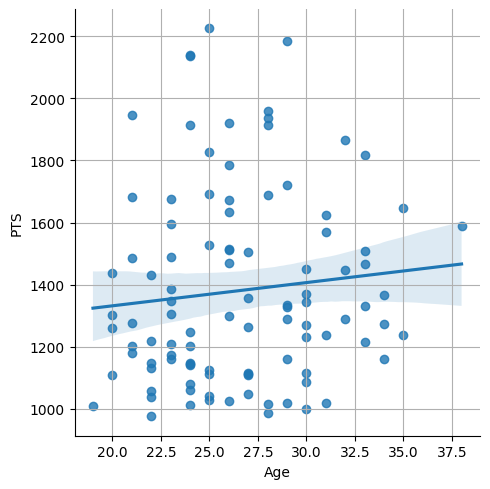

In [195]:
#Grafico de dispersão Idade x Pontos
sns.lmplot(x='Age', y='PTS', data=cem_melhores);plt.grid(True)


In [198]:
statistic, p_value = stats.ttest_ind(amostra_age, amostra_pts)


In [197]:
statistic = -43.92276804074934
pvalue = 1.1304154145995285

Text(0.5, 1.0, 'Resultado do teste de Hipótese')

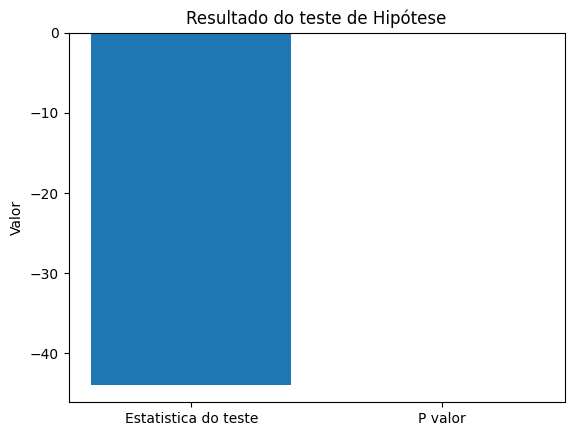

In [199]:
resultados = {'Estatistica do teste': statistic, 'P valor': p_value}
plt.bar(resultados.keys(), resultados.values())
plt.ylabel('Valor')
plt.title('Resultado do teste de Hipótese')

In [ ]:
#h0 é falsa?